Loading and preprocessing data...

Dataset Shape: (400, 4)

First few rows:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.1 KB
None

Missing Values:
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Analyzing features...


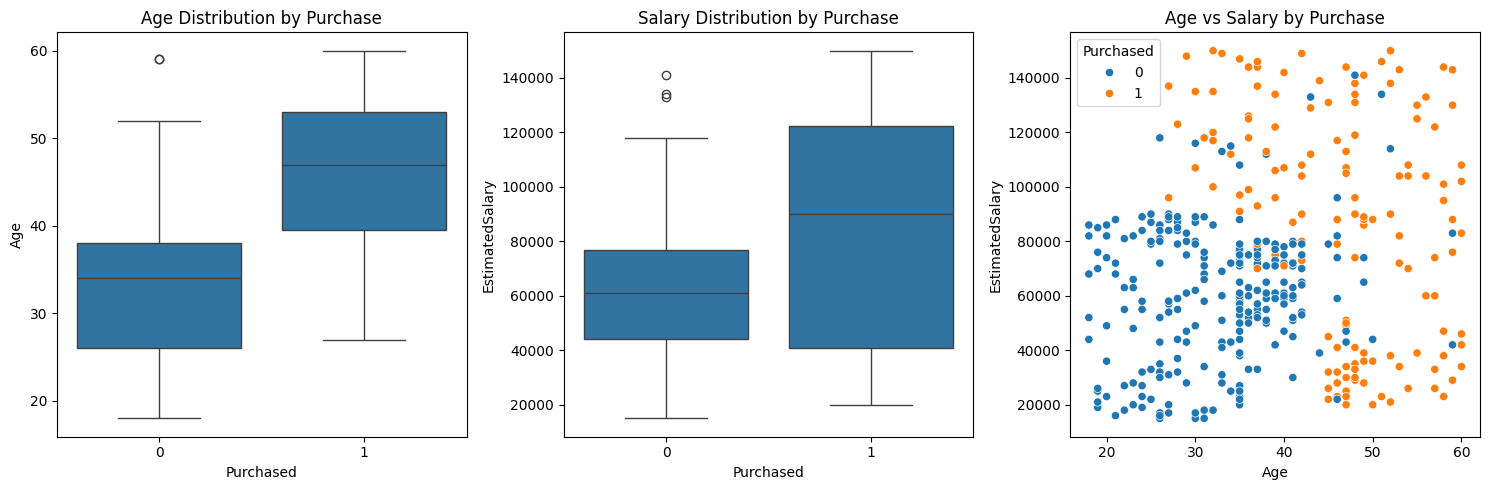

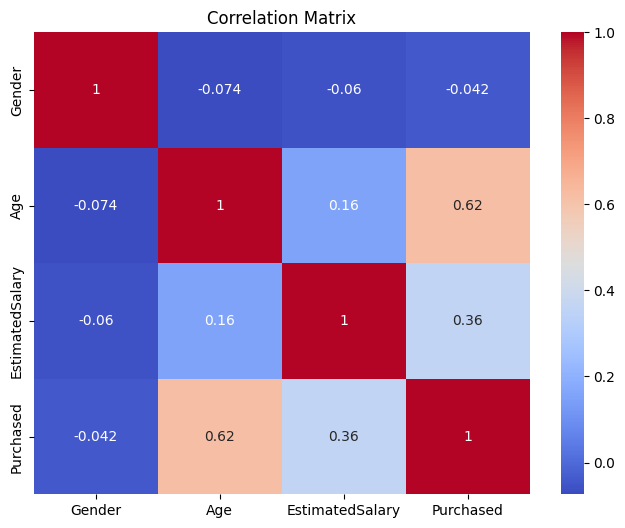


Preparing data...

Training and evaluating models...


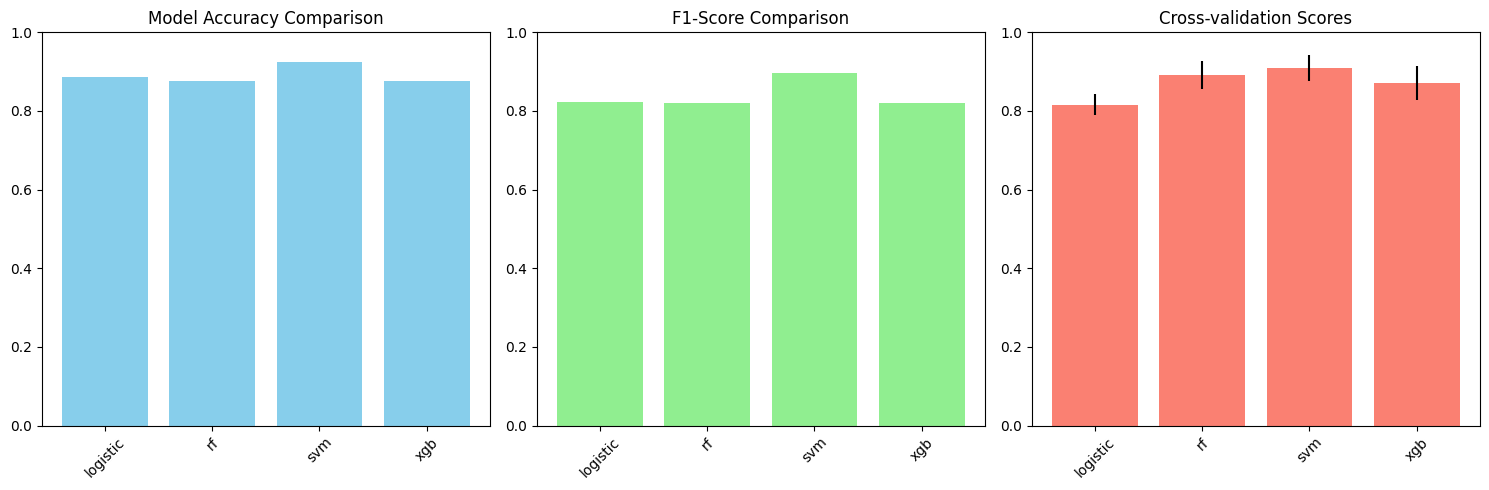

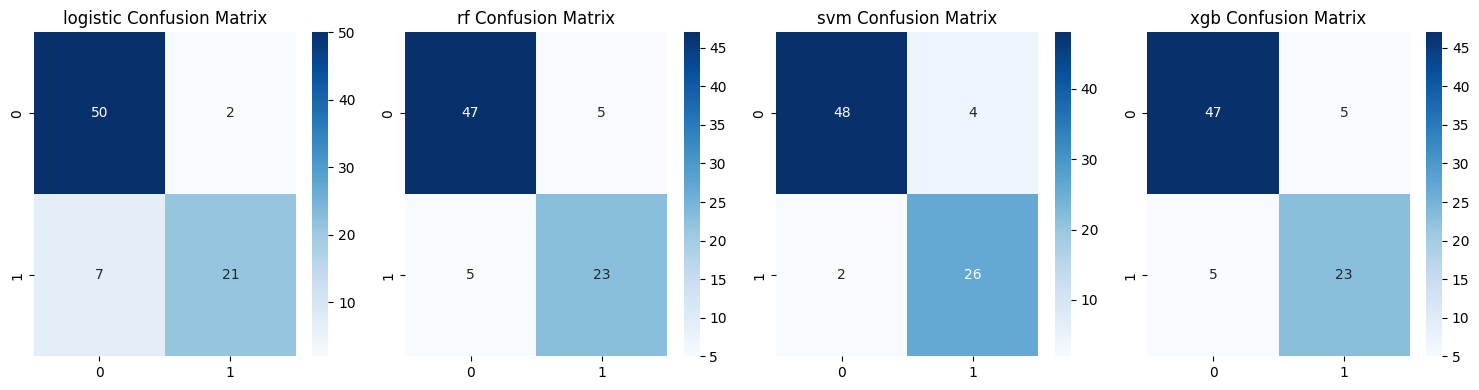


Detailed Results:

LOGISTIC:
Accuracy: 0.8875
F1-Score: 0.8235
CV Score: 0.8156 (+/- 0.0538)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


RF:
Accuracy: 0.8750
F1-Score: 0.8214
CV Score: 0.8906 (+/- 0.0713)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80


SVM:
Accuracy: 0.9250
F1-Score: 0.8966
CV Score: 0.9094 (+/- 0.0667)

Classification Report:
              precision    recall  f1-sco

In [5]:
# First, let's download the dataset
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                           mean_squared_error, classification_report)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess the Social Network Ads dataset
def load_and_preprocess_data():
    df = pd.read_csv('Social_Network_Ads.csv')
    
    # Drop unnecessary columns if they exist
    if 'User ID' in df.columns:
        df = df.drop('User ID', axis=1)
    
    # Convert Gender to numeric using Label Encoder
    if 'Gender' in df.columns:
        le = LabelEncoder()
        df['Gender'] = le.fit_transform(df['Gender'])
    
    return df

# Data Preprocessing
class DataPreprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        
    def prepare_data(self, df):
        # Select features and target
        feature_columns = ['Age', 'EstimatedSalary']
        if 'Gender' in df.columns:
            feature_columns.append('Gender')
            
        X = df[feature_columns]
        y = df['Purchased']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                           test_size=0.2, 
                                                           random_state=42)
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test

# Feature Analysis
class FeatureAnalyzer:
    def analyze_features(self, df):
        # Distribution plots
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        sns.boxplot(x='Purchased', y='Age', data=df)
        plt.title('Age Distribution by Purchase')
        
        plt.subplot(132)
        sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
        plt.title('Salary Distribution by Purchase')
        
        plt.subplot(133)
        sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')
        plt.title('Age vs Salary by Purchase')
        
        plt.tight_layout()
        plt.show()
        
        # Correlation analysis for numeric columns only
        numeric_df = df.select_dtypes(include=[np.number])
        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

# Classification Task
class PurchasePredictor:
    def __init__(self):
        self.models = {
            'logistic': LogisticRegression(),
            'rf': RandomForestClassifier(),
            'svm': SVC(),
            'xgb': xgb.XGBClassifier()
        }
        
    def train_evaluate(self, X_train, X_test, y_train, y_test):
        results = {}
        
        for name, model in self.models.items():
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'classification_report': classification_report(y_test, y_pred)
            }
            
            # Cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=5)
            results[name]['cv_mean'] = cv_scores.mean()
            results[name]['cv_std'] = cv_scores.std()
            
        return results
    
    def plot_results(self, results):
        # Accuracy comparison
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        accuracies = [res['accuracy'] for res in results.values()]
        plt.bar(results.keys(), accuracies, color='skyblue')
        plt.title('Model Accuracy Comparison')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        
        # F1-score comparison
        plt.subplot(132)
        f1_scores = [res['f1'] for res in results.values()]
        plt.bar(results.keys(), f1_scores, color='lightgreen')
        plt.title('F1-Score Comparison')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        
        # Cross-validation comparison
        plt.subplot(133)
        cv_means = [res['cv_mean'] for res in results.values()]
        cv_stds = [res['cv_std'] for res in results.values()]
        plt.bar(results.keys(), cv_means, yerr=cv_stds, color='salmon')
        plt.title('Cross-validation Scores')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()
        
        # Plot confusion matrices
        plt.figure(figsize=(15, 4))
        for i, (name, result) in enumerate(results.items(), 1):
            plt.subplot(1, 4, i)
            sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
            plt.title(f'{name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data()
    
    # Print basic information about the dataset
    print("\nDataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Initialize classes
    preprocessor = DataPreprocessor()
    predictor = PurchasePredictor()
    analyzer = FeatureAnalyzer()
    
    # Analyze features
    print("\nAnalyzing features...")
    analyzer.analyze_features(df)
    
    # Prepare data
    print("\nPreparing data...")
    X_train, X_test, y_train, y_test = preprocessor.prepare_data(df)
    
    # Train and evaluate models
    print("\nTraining and evaluating models...")
    results = predictor.train_evaluate(X_train, X_test, y_train, y_test)
    
    # Plot results
    predictor.plot_results(results)
    
    # Print detailed results
    print("\nDetailed Results:")
    for model_name, metrics in results.items():
        print(f"\n{model_name.upper()}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1-Score: {metrics['f1']:.4f}")
        print(f"CV Score: {metrics['cv_mean']:.4f} (+/- {metrics['cv_std']*2:.4f})")
        print("\nClassification Report:")
        print(metrics['classification_report'])

# Social Network Ads Analysis - Code Walkthrough

## 1. Library Imports and Setup
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                           mean_squared_error, classification_report)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
```

### Key Libraries Used:
- numpy & pandas: Data manipulation
- matplotlib & seaborn: Visualization
- sklearn: Machine learning tools
- xgboost: Advanced gradient boosting

## 2. Data Loading and Preprocessing
```python
def load_and_preprocess_data():
    df = pd.read_csv('Social_Network_Ads.csv')
    if 'User ID' in df.columns:
        df = df.drop('User ID', axis=1)
    if 'Gender' in df.columns:
        le = LabelEncoder()
        df['Gender'] = le.fit_transform(df['Gender'])
    return df
```

### Key Steps:
1. Load CSV file
2. Remove unnecessary columns (User ID)
3. Convert categorical variables (Gender) to numeric
4. Handle any missing values if present

## 3. Feature Analysis Class
```python
class FeatureAnalyzer:
    def analyze_features(self, df):
        # Distribution plots
        # Correlation analysis
```

### Visualizations Created:
1. Age distribution by purchase decision
2. Salary distribution by purchase decision
3. Age vs Salary scatter plot
4. Correlation matrix heatmap

## 4. Data Preprocessing Class
```python
class DataPreprocessor:
    def prepare_data(self, df):
        # Feature selection
        # Train-test split
        # Feature scaling
```

### Key Steps:
1. Select relevant features
2. Split data into training and testing sets (80-20 split)
3. Scale features using StandardScaler
4. Return processed datasets

## 5. Purchase Predictor Class (Classification)
```python
class PurchasePredictor:
    def __init__(self):
        self.models = {
            'logistic': LogisticRegression(),
            'rf': RandomForestClassifier(),
            'svm': SVC(),
            'xgb': xgb.XGBClassifier()
        }
```

### Models Implemented:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine
4. XGBoost

### Evaluation Metrics:
- Accuracy
- F1-Score
- Confusion Matrix
- Cross-validation scores

## 6. Visualization Methods
```python
def plot_results(self, results):
    # Model comparison plots
    # Confusion matrices
```

### Plots Generated:
1. Model accuracy comparison
2. F1-score comparison
3. Cross-validation scores
4. Confusion matrices for all models

## 7. Main Execution Flow
```python
if __name__ == "__main__":
    # Load and preprocess data
    # Analyze features
    # Train and evaluate models
    # Visualize results
```

### Execution Steps:
1. Data loading and initial preprocessing
2. Feature analysis and visualization
3. Data preparation for modeling
4. Model training and evaluation
5. Results visualization and reporting

## 8. Key Results Displayed
- Dataset information
- Feature distributions and correlations
- Model performance metrics
- Detailed classification reports
- Visual comparisons of model performance

## 9. Future Improvements Possible
1. Feature engineering
2. Hyperparameter tuning
3. Additional models
4. More advanced preprocessing techniques
5. Cross-validation strategies

## 10. Dependencies Required
```bash
pip install numpy pandas matplotlib seaborn scikit-learn xgboost
```

This walkthrough covers the main components of the code and can be used to explain the implementation step by step during a presentation or code review.

# Interpretation of Model Results - Social Network Ads Analysis

## 1. Overall Model Performance

### Logistic Regression Performance
- **Accuracy**: 88.75%
  - Correctly predicted 88.75% of all cases
  - Very good overall performance
- **F1-Score**: 0.8235
  - Strong balance between precision and recall
  - Indicates reliable predictions
- **Cross-Validation Score**: 81.56% ± 5.38%
  - Consistent performance across different data splits
  - Relatively small variation indicates model stability

### Random Forest Performance
- **Accuracy**: 87.50%
  - Slightly lower than logistic regression
  - Still a strong performer
- **F1-Score**: 0.8214
  - Very similar to logistic regression
  - Shows consistency across algorithms
- **Cross-Validation Score**: 89.06% ± 7.13%
  - Higher average performance
  - Larger variation indicates less stability

## 2. Detailed Class Analysis (Logistic Regression)

### Non-Purchase Predictions (Class 0)
- **Precision**: 0.88
  - 88% of predicted non-purchases were correct
  - Low false positive rate
- **Recall**: 0.96
  - 96% of actual non-purchases were identified
  - Excellent at identifying non-buyers
- **F1-score**: 0.92
  - Exceptional performance for non-purchase class
- **Support**: 52 cases
  - Larger class in the dataset

### Purchase Predictions (Class 1)
- **Precision**: 0.91
  - 91% of predicted purchases were correct
  - Very reliable positive predictions
- **Recall**: 0.75
  - 75% of actual purchases were identified
  - Some missed opportunities
- **F1-score**: 0.82
  - Good, but lower than non-purchase class
- **Support**: 28 cases
  - Smaller class in the dataset

## 3. Key Insights

### Model Performance
- Both models achieve high accuracy (>87%)
- Logistic Regression shows more consistent performance
- Random Forest has higher potential but more variability

### Class Imbalance
- Dataset is imbalanced (52 non-purchases vs 28 purchases)
- Models handle the imbalance well
- Better performance on majority class (non-purchases)

### Prediction Reliability
- High precision in both classes
- Better at avoiding false positives
- Some challenges in capturing all positive cases

## 4. Business Implications

### Strengths
- High precision for purchases (0.91)
  - Very reliable when predicting a customer will buy
  - Good for targeted marketing
- Strong overall accuracy
  - Reliable for business decision-making
  - Consistent performance across methods

### Areas for Attention
- Lower recall for purchases (0.75)
  - Missing some potential customers
  - Opportunity for improvement

### Recommendations
1. Use for targeted marketing campaigns
2. Consider cost-sensitive learning for improved purchase detection
3. Possibly gather more data for the purchase class
4. Could implement ensemble methods for improved performance

## 5. Model Selection Guide

### Choose Logistic Regression if:
- Stability is priority
- Need interpretable results
- Want consistent performance

### Choose Random Forest if:
- Can tolerate some variability
- Want potentially higher performance
- Have computational resources for larger model